In [2]:
os.chdir('/home/jdeep/mlops-zoomcamp/final_project')

import os
import src.variables as var

In [4]:
import pandas as pd
print(os.getcwd())
dataset = pd.read_csv('data/raw/MiningProcess_Flotation_Plant_Database.csv', decimal = ',')


/home/jdeep/mlops-zoomcamp/final_project


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [4]:
dataset.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
count_dup = dataset.duplicated(keep = False).sum()
print(count_dup)
dataset = dataset.drop_duplicates()

1186


In [6]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index("date")
print(dataset.info())
f_resampled = dataset.resample("5S").first().dropna().reset_index()
print(f_resampled.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 736282 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   736282 non-null  float64
 1   % Silica Feed                 736282 non-null  float64
 2   Starch Flow                   736282 non-null  float64
 3   Amina Flow                    736282 non-null  float64
 4   Ore Pulp Flow                 736282 non-null  float64
 5   Ore Pulp pH                   736282 non-null  float64
 6   Ore Pulp Density              736282 non-null  float64
 7   Flotation Column 01 Air Flow  736282 non-null  float64
 8   Flotation Column 02 Air Flow  736282 non-null  float64
 9   Flotation Column 03 Air Flow  736282 non-null  float64
 10  Flotation Column 04 Air Flow  736282 non-null  float64
 11  Flotation Column 05 Air Flow  736282 non-null  float64
 12  Flotation 

/tmp/ipykernel_6126/2012015009.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  f_resampled = dataset.resample("5S").first().dropna().reset_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4097 non-null   datetime64[ns]
 1   % Iron Feed                   4097 non-null   float64       
 2   % Silica Feed                 4097 non-null   float64       
 3   Starch Flow                   4097 non-null   float64       
 4   Amina Flow                    4097 non-null   float64       
 5   Ore Pulp Flow                 4097 non-null   float64       
 6   Ore Pulp pH                   4097 non-null   float64       
 7   Ore Pulp Density              4097 non-null   float64       
 8   Flotation Column 01 Air Flow  4097 non-null   float64       
 9   Flotation Column 02 Air Flow  4097 non-null   float64       
 10  Flotation Column 03 Air Flow  4097 non-null   float64       
 11  Flotation Column 04 Air Flow  

array([[<Axes: title={'center': '% Silica Concentrate'}>]], dtype=object)

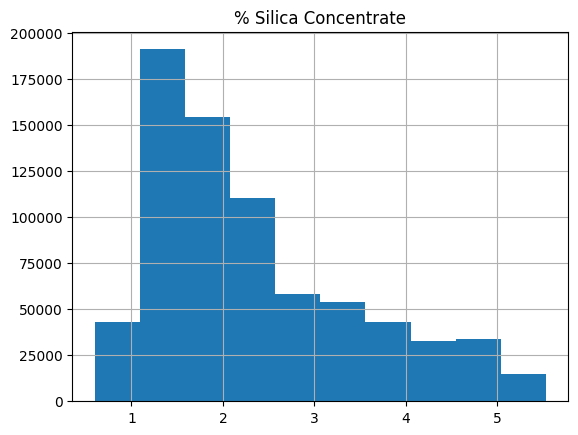

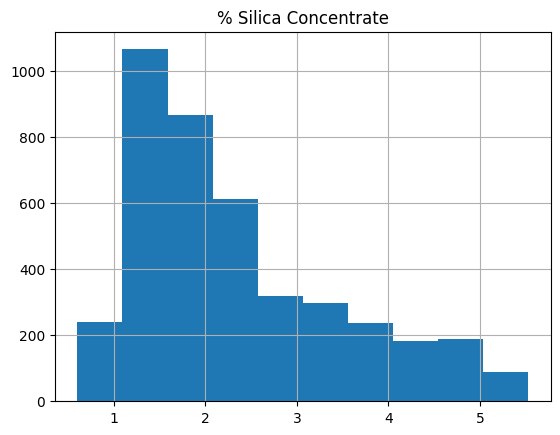

In [10]:
import src.variables as var

dataset[var.target].hist()
f_resampled[var.target].hist()

In [11]:
f_resampled.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.530,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 02:00:00,55.2,16.98,3170.410,539.673,399.697,10.15890,1.66910,249.291,248.269,...,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,67.06,1.11
2,2017-03-10 03:00:00,55.2,16.98,3365.650,573.517,399.023,10.08600,1.70565,249.379,253.312,...,249.060,456.445,440.432,456.625,432.736,464.334,445.950,432.906,66.97,1.27
3,2017-03-10 04:00:00,55.2,16.98,2693.750,592.133,409.204,9.94880,1.72472,248.302,251.906,...,249.236,459.248,480.114,453.814,433.885,438.642,421.974,408.193,66.75,1.36
4,2017-03-10 05:00:00,55.2,16.98,2352.216,601.807,398.145,9.84375,1.75928,248.950,246.313,...,252.686,558.545,548.280,551.960,561.720,543.070,529.260,514.240,66.63,1.34


In [7]:
dataset['date'].info()

<class 'pandas.core.series.Series'>
Index: 736282 entries, 0 to 737452
Series name: date
Non-Null Count   Dtype         
--------------   -----         
736282 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.2 MB


In [8]:
air_flow = dataset[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow']]
froth_lvl = dataset[['Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']]
dataset['Average Air Flow'] = air_flow.mean(axis=1).round(2)
dataset['Average Froth Level'] = froth_lvl.mean(axis=1).round(2)
dataset.insert(8, 'Average Air Flow', dataset.pop('Average Air Flow'))
dataset.insert(9, 'Average Froth Level', dataset.pop('Average Froth Level'))
col_to_drop = air_flow + froth_lvl
dataset = dataset.drop(columns=col_to_drop)
dataset.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Average Air Flow,Average Froth Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.09,461.55,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.53,457.55,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.12,456.47,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.36,448.06,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.66,448.78,66.91,1.31


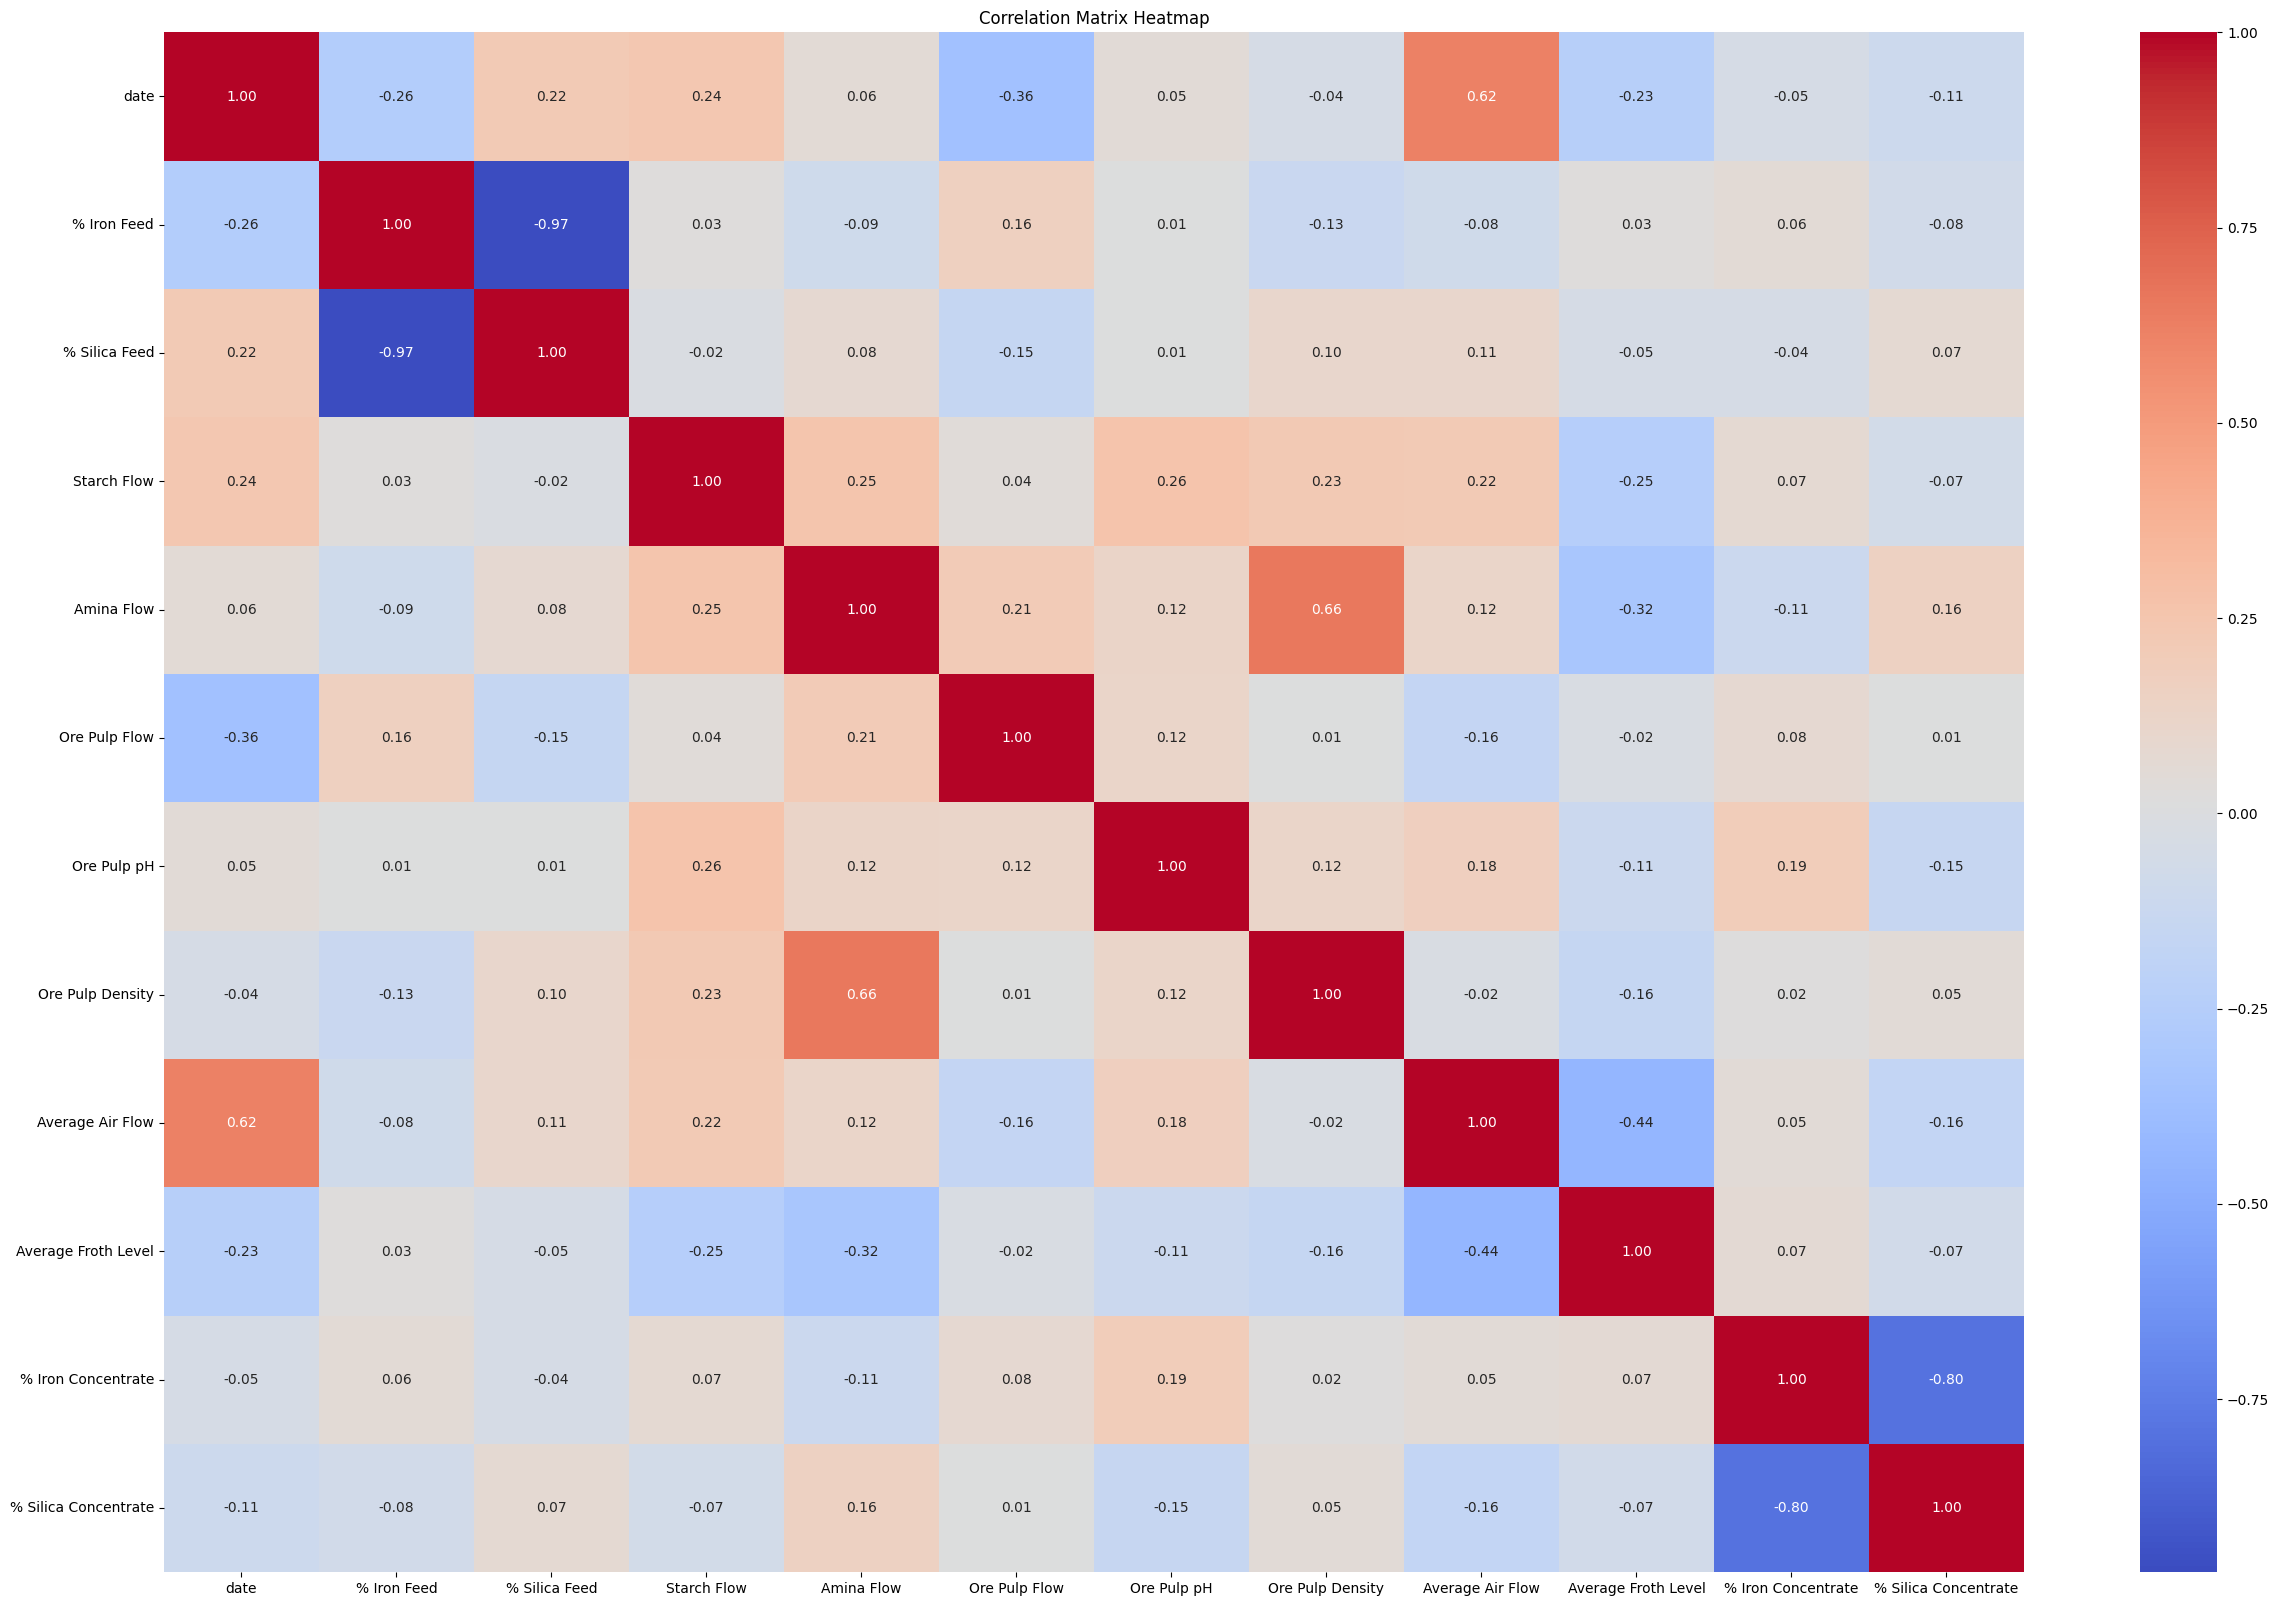

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = dataset.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
dataset.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Average Air Flow',
       'Average Froth Level', '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [ ]:
# Taking the highest corelated featur for the target variable '%silica concentrate'

features = ['% Iron Concentrate', 'Amina Flow', 'Ore Pulp pH', 'Average Air Flow']
target = ['% Silica Concentrate']

In [ ]:
## Split the dataset in to test train and validation datasets